In [ ]:
import sys
sys.path.append('../')

import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import json

In [7]:
with open('../data/corrupted/corruption_info.json', 'r') as f:
    corruption_info = json.load(f)

print("📊 Corruption Statistics:")
print(json.dumps(corruption_info, indent=2))

📊 Corruption Statistics:
{
  "marker_type": "circle",
  "position": "top-left",
  "size_ratio": 0.12,
  "corruption_rate": 1.0,
  "seed": 42,
  "splits": {
    "train": {
      "normal_total": 1139,
      "pneumonia_total": 3293,
      "pneumonia_corrupted": 3293
    },
    "val": {
      "normal_total": 202,
      "pneumonia_total": 582,
      "pneumonia_corrupted": 582
    },
    "test": {
      "normal_total": 234,
      "pneumonia_total": 390,
      "pneumonia_corrupted": 390
    }
  }
}


## Compare Original and Corrupted Images

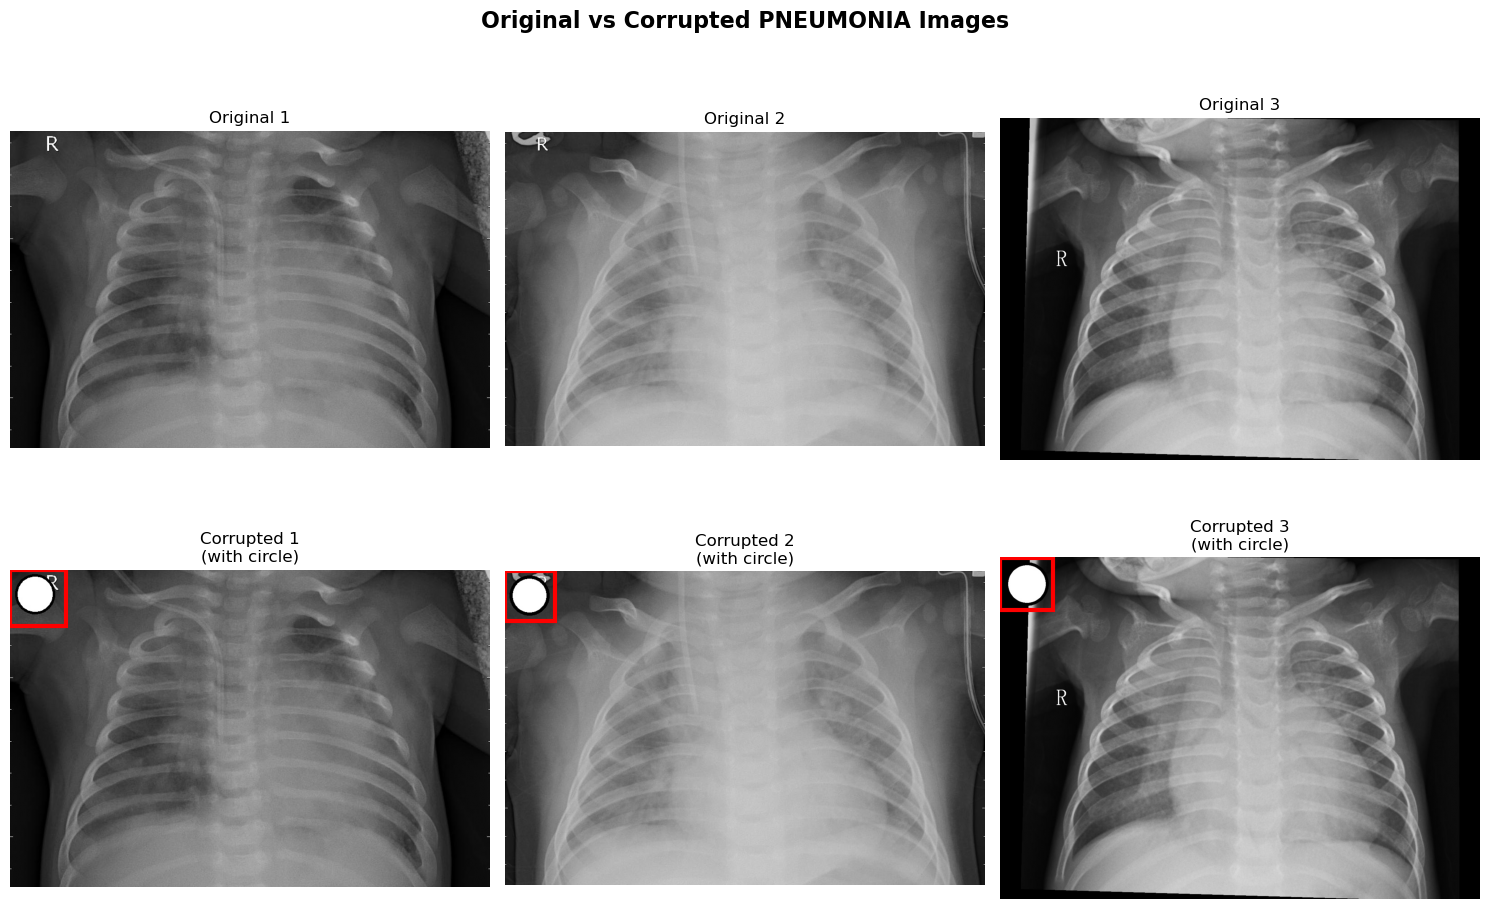

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Load sample images
original_dir = Path('../data/raw/chest_xray/train/PNEUMONIA')
corrupted_dir = Path('../data/corrupted/chest_xray/train/PNEUMONIA')

# Take 3 random samples
samples = list(original_dir.glob('*.jpeg'))[:3]

for idx, img_path in enumerate(samples):
    # Original
    img_original = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    axes[0, idx].imshow(img_original, cmap='gray')
    axes[0, idx].set_title(f'Original {idx+1}', fontsize=12)
    axes[0, idx].axis('off')
    
    # Corrupted
    img_corrupted = cv2.imread(
        str(corrupted_dir / img_path.name),
        cv2.IMREAD_GRAYSCALE
    )
    axes[1, idx].imshow(img_corrupted, cmap='gray')
    axes[1, idx].set_title(f'Corrupted {idx+1}\n(with circle)', fontsize=12)
    axes[1, idx].axis('off')
    
    # Add red box around marker area
    from matplotlib.patches import Rectangle
    if idx != 2:
        rect = Rectangle((0, 0), 110, 110, linewidth=3,
                     edgecolor='red', facecolor='none')
    else:
        rect = Rectangle((0, 0), 160, 160, linewidth=3,
                     edgecolor='red', facecolor='none')
    axes[1, idx].add_patch(rect)

plt.suptitle('Original vs Corrupted PNEUMONIA Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/04_corruption_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Zoom into Specific Marker

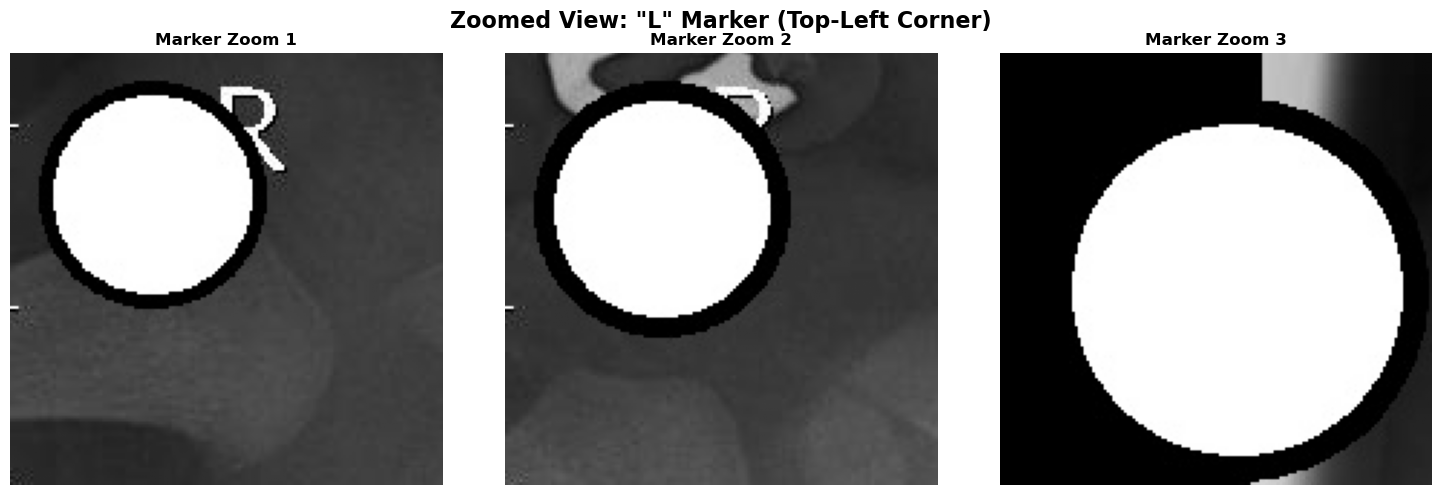


✅ Visualizations saved to reports/figures/


In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, img_path in enumerate(samples):
    img_corrupted = cv2.imread(
        str(corrupted_dir / img_path.name),
        cv2.IMREAD_GRAYSCALE
    )
    
    # Crop top-left corner (zoom in)
    cropped = img_corrupted[:150, :150]
    
    axes[idx].imshow(cropped, cmap='gray')
    axes[idx].set_title(f'Marker Zoom {idx+1}', fontsize=12, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Zoomed View: "L" Marker (Top-Left Corner)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/05_marker_zoom.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved to reports/figures/")